In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import os 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
gdrive_dir = "gdrive/My Drive/CS3244"
train_data_dir = os.path.join(gdrive_dir, "datasets/Train")
test_data_dir = os.path.join(gdrive_dir, "datasets/Test")
# train
subject_id_train_filepath = os.path.join(train_data_dir, "subject_id_train.txt")
X_train_filepath = os.path.join(train_data_dir, "X_train.txt")
y_train_filepath = os.path.join(train_data_dir, "y_train.txt")
# test
subject_id_test_filepath = os.path.join(test_data_dir, "subject_id_test.txt")
X_test_filepath = os.path.join(test_data_dir, "X_test.txt")
y_test_filepath = os.path.join(test_data_dir, "y_test.txt")
# features
features_filepath = os.path.join(gdrive_dir, "datasets/features.txt")

In [4]:
with open(features_filepath, 'r') as tf:
    features = tf.read().split('\n')
features = features[:-1] # remove last newline

# Read train data into pd
subject_id_train = pd.read_csv(subject_id_train_filepath, header=None)
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)

X_train_df.columns = features
X_train_df.insert(0, 'subject_id', subject_id_train)
X_train_df

subject_id  ...  tZAxisAcc-AngleWRTGravity-1    
0              1  ...                        -0.051718
1              1  ...                        -0.047436
2              1  ...                        -0.042271
3              1  ...                        -0.040826
4              1  ...                        -0.037080
...          ...  ...                              ...
7762          30  ...                         0.056020
7763          30  ...                         0.056252
7764          30  ...                         0.047071
7765          30  ...                         0.031700
7766          30  ...                         0.042981

[7767 rows x 562 columns]

In [5]:
# Read test data into pd
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)
X_test_df.columns = features
# X_test_df.columns = features
# X_test_df.insert(0, 'subject_id', subject_id_test)
# y_test.columns = ['label']

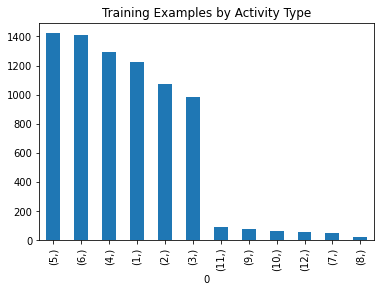

In [6]:
# histogram visualization of training data
# we know there are 12 labels
# y_train_df.hist(bins=y_train_df.max()[0])
y_train_df.value_counts().plot(kind='bar',
                          title='Training Examples by Activity Type')

From the above histogram, we observe that our data is highly imbalanced for labels concerning the transition of one position to the next compared to the labels for the positions. Even amongst the position labels, a small degree of imbalance can be observed; largest between position 3 and position 5.

Resampling may need to be considered.

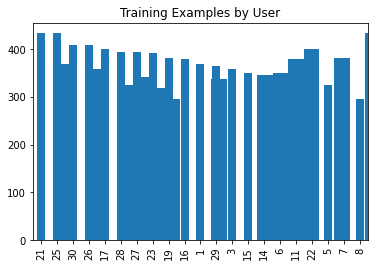

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
6594                         0.052110  ...                         0.368941
6595                         0.027060  ...                         0.376718
6596                         0.010848  ...                         0.387294
6597                         0.037183  ...                         0.406281
6598                         0.048483  ...                         0.408951

[6599 rows x 561 columns]

In [7]:
# Spliting of data set 
# We should split the data set by users rather than by a percentage
# Only worrying about having at least a few example records per activity is not sufficient (credit https://towardsdatascience.com/human-activity-recognition-har-tutorial-with-keras-and-core-ml-part-1-8c05e365dfa0 )

X_train_df.hist(column="subject_id", bins = subject_id_train.max()[0])
X_train_df['subject_id'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()
# observed from the histogram, we have a decent spread of data among the participants in the training set

X_train = X_train_df[X_train_df['subject_id'] <= 27].drop(columns=['subject_id'])
X_val = X_train_df[X_train_df['subject_id'] > 27].drop(columns=['subject_id'])

X_train

In [8]:
y_train_df.insert(0, 'subject_id', subject_id_train)
y_train = y_train_df[y_train_df['subject_id'] <= 27]
y_val = y_train_df[y_train_df['subject_id'] > 27]
y_train = y_train.drop(columns=['subject_id'])
y_val = y_val.drop(columns=['subject_id'])
y_train_df = y_train_df.drop(columns=['subject_id'])

### Run all the code above before running any of the below models

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 1/75	 cost: 2.34755725	 val_acc: 0.6935
Epoch: 2/75	 cost: 1.12401329	 val_acc: 0.8587
Epoch: 3/75	 cost: 0.66437209	 val_acc: 0.8545
Epoch: 4/75	 cost: 0.49908749	 val_acc: 0.8587
Epoch: 5/75	 cost: 0.40716111	 val_acc: 0.8870
Epoch: 6/75	 cost: 0.34822361	 val_acc: 0.8913
Epoch: 7/75	 cost: 0.29015868	 val_acc: 0.8844
Epoch: 8/75	 cost: 0.25264668	 val_acc: 0.9033
Epoch: 9/75	 cost: 0.23380203	 val_acc: 0.9101
Epoch: 10/75	 cost: 0.21591859	 val_acc: 0.9050
Epoch: 11/75	 cost: 0.19771538	 val_acc: 0.9110
Epoch: 12/75	 cost: 0.18837279	 val_acc: 0.9127
Epoch: 13/75	 cost: 0.17887619	 val_acc: 0.9118
Epoch: 14/75	 cost: 0.16242602	 val_acc: 0.9178
Epoch: 15/75	 cost: 0.16179677	 val_acc: 0.9110
Epoch: 16/75	 cost: 0.15036485	 val_acc: 0.9161
Epoch: 17/75	 cost: 0.13712540	 val_acc: 

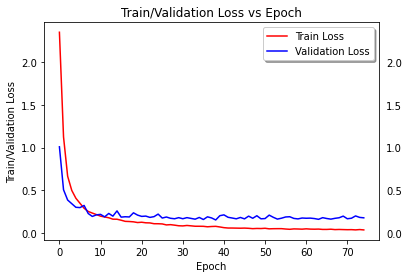

In [ ]:
# MLP
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  

X_train_np = X_train.to_numpy().astype(np.float32)
X_val_np = X_val.to_numpy().astype(np.float32)
y_train_np = y_train.to_numpy().astype(np.float32).flatten()
y_train_np = np.arange(1,13) == y_train_np[np.newaxis,:].T 
y_val_np = y_val.to_numpy().astype(np.float32).flatten()
y_val_np = np.arange(1,13) == y_val_np[np.newaxis,:].T 

train_perm = np.random.permutation(X_train_np.shape[0])
X_train_np = X_train_np[train_perm,:]
y_train_np = y_train_np[train_perm,:]

val_perm = np.random.permutation(X_val_np.shape[0])
X_val_np = X_val_np[val_perm,:]
y_val_np = y_val_np[val_perm,:]

X_test_np = X_test_df.to_numpy().astype(np.float32)
y_test_np = y_test_df.to_numpy().astype(np.float32).flatten()
y_test_np = np.arange(1,13) == y_test_np[np.newaxis,:].T

training_epochs = 75
batch_size = 64


X = tf.placeholder(tf.float32,[None,561])
Y = tf.placeholder(tf.float32,[None,12])
nhidden = 1024
W1 = tf.Variable(0.001*np.random.randn(X_train_np.shape[1],nhidden).astype(np.float32), name='weights')
b1 = tf.Variable(0.001*np.random.randn(nhidden).astype(np.float32), name='bias')

W2 = tf.Variable(0.001*np.random.randn(nhidden,12).astype(np.float32), name='weights')
b2 = tf.Variable(0.001*np.random.randn(12).astype(np.float32), name='bias')

dropout = tf.placeholder(tf.float32,[])

h0 = tf.nn.dropout(tf.nn.relu(tf.matmul(X,W1) + b1), dropout)

pred = tf.matmul(h0,W2)+b2

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(tf.nn.softmax(pred)+1e-10),reduction_indices=1))
# cost = tf.contrib.losses.hinge_loss(logits=pred, labels=Y)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred,1),tf.argmax(Y,1)), tf.float32))

learning_rate = tf.placeholder(tf.float32,[])

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(0.0005).minimize(cost)

loss = np.zeros(training_epochs)
loss_val = np.zeros(training_epochs)
val_acc = np.zeros(training_epochs)
init = tf.global_variables_initializer()

lr = 0.0005

with tf.Session() as sess:
	sess.run(init)
	for epoch in range(training_epochs):
		if epoch % 40 == 0:
			lr /= 2
		num_batches = int(X_train_np.shape[0]/batch_size)
		curr_loss = 0
		perm = np.random.permutation(X_train_np.shape[0])
		X_train_np = X_train_np[perm,:]
		y_train_np = y_train_np[perm,:]
		for i in range(num_batches):
			idxs = i*batch_size
			idxe = idxs + batch_size
			batch_x = X_train_np[idxs:idxe,:] 
			batch_y = y_train_np[idxs:idxe,:]
			
			_,c = sess.run([optimizer,cost], feed_dict={X:batch_x,Y:batch_y, dropout:0.8, learning_rate:lr})
			curr_loss += c/batch_size
		loss[epoch] = curr_loss	
		loss_val[epoch] = cost.eval({X:X_val_np, Y:y_val_np, dropout:1})
		val_acc[epoch] = accuracy.eval({X:X_val_np, Y:y_val_np, dropout:1})

		print('Epoch: %d/%d\t cost: %.8f\t val_acc: %.4f' % (epoch+1,training_epochs, curr_loss, val_acc[epoch]))

	print("Training Accuracy: ", accuracy.eval({X:X_train_np, Y:y_train_np, dropout:1}))
	print("Test Accuracy: ", accuracy.eval({X:X_test_np, Y:y_test_np, dropout:1}))

	plt.plot(loss,'r-', label='Train Loss')
	plt.plot(loss_val,'b-', label='Validation Loss')
	plt.tick_params(labelright = True)
	plt.title('Train/Validation Loss vs Epoch')
	plt.ylabel('Train/Validation Loss')
	plt.xlabel('Epoch')
	plt.legend(['Train Loss', 'Validation Loss'], loc='upper right', shadow=True)
	plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test_df)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([5, 5, 5, ..., 2, 2, 2])

In [ ]:
accuracy = model.score(X_test_df, y_test_df)
accuracy

0.9313725490196079

In [9]:
# Samuel
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
for k in range(1,15):
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train, y_train)
  accuracy = knn_model.score(X_test_df, y_test_df)
  accuracies.append(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

The best value of k is 7 with an accuracy of 0.8820366856419988


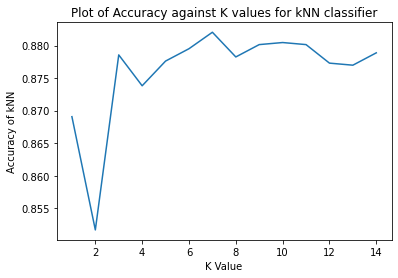

In [10]:
plt.figure(1)
k_values = [k for k in range(1, 15)]
plt.plot(np.array(k_values), np.array(accuracies))
plt.xlabel("K Value")
plt.ylabel("Accuracy of kNN")
plt.title("Plot of Accuracy against K values for kNN classifier")
print(f"The best value of k is {accuracies.index(max(accuracies)) + 1} with an accuracy of {max(accuracies)}")

In [ ]:
# Samuel
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train.values.flatten())
accuracy = GNB_model.score(X_test_df, y_test_df)
print(f"Accuracy of GaussianNB model: {accuracy}")

Accuracy of GaussianNB model: 0.7226438962681847


## Implementing PCA and LDA

In [11]:
# print(X_train_df, X_test_df)
X_train_df.drop("subject_id", axis=1, inplace=True)
frames = [X_train_df, X_test_df]
result = pd.concat(frames)
result

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
3157                         0.052279  ...                         0.190104
3158                         0.073745  ...                         0.187748
3159                         0.068334  ...                         0.186527
3160                         0.023016  ...                         0.192865
3161                        -0.010846  ...                         0.193402

[10929 rows x 561 columns]

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()

result_transformed = sc.fit_transform(result)
result_transformed

array([[ 0.04229753, -0.04987031, -0.18730766, ..., -0.68490752,
         0.40378404, -0.00350964],
       [ 0.0020512 , -0.01173583, -0.1194426 , ..., -0.69185739,
         0.4049132 ,  0.01258021],
       [ 0.00693757, -0.04174955, -0.04670704, ..., -0.6999948 ,
         0.40604285,  0.03198754],
       ...,
       [ 0.28530967,  0.44474641, -0.06352887, ..., -0.32004781,
         0.71029105,  0.89169481],
       [-0.1595766 ,  0.33073808,  0.07595511, ..., -0.32860893,
         0.67885137,  0.91550876],
       [-0.49200392, -0.03162923, -0.21705211, ..., -0.32931876,
         0.67611038,  0.9175264 ]])

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(result_transformed)
reduced_result = pca.transform(result_transformed)
pca.n_components_

106

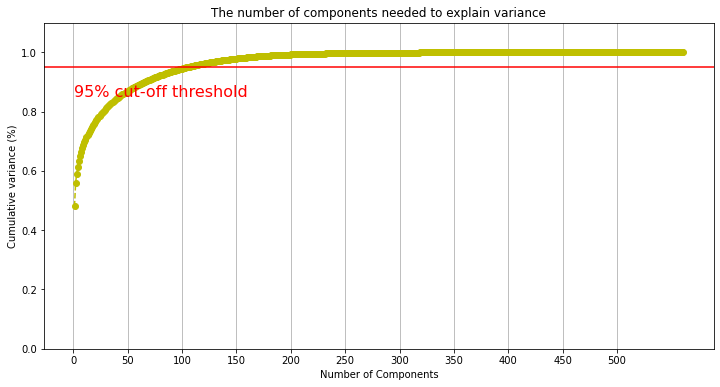

In [14]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(result_transformed)
plt.rcParams["figure.figsize"] = (12, 6)
fig, ax = plt.subplots()
xi = np.arange(1, 562, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker="o", linestyle="--", color="y")

plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 550, step=50)) # change from 0-based array index to 1-based human-readable label
plt.ylabel("Cumulative variance (%)") 
plt.title("The number of components needed to explain variance")

plt.axhline(y=0.95, color="r", linestyle="-")
plt.text(0.5, 0.85, "95% cut-off threshold", color="red", fontsize=16)

ax.grid(axis="x")
plt.show()


Based on the graph, the interception between the threshold line and the number of components is around 100. This indicates that we need around 100 components to reach 0.95 accuracy.

In [15]:
X_train_pca = reduced_result[0:7767]
X_test_pca = reduced_result[7767:]

knn_model_pca = KNeighborsClassifier(n_neighbors = 6)
knn_model_pca.fit(X_train_pca, y_train_df)

pca_accuracy = knn_model_pca.score(X_test_pca, y_test_df)
print(f"This is the accuracy after PCA for KNN: {pca_accuracy}")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


This is the accuracy after PCA for KNN: 0.8567362428842504


In [ ]:
# Naive Bayes based on PCA too
GNB_model_pca = GaussianNB()
GNB_model_pca.fit(X_train_pca, y_train_df)
accuracy_nb_pca = GNB_model_pca.score(X_test_pca, y_test_df)
print(f"Accuracy of GaussianNB model with PCA: {accuracy_nb_pca}")

Accuracy of GaussianNB model with PCA: 0.8045540796963947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### LDA Analysis

In [16]:
result_transformed

array([[ 0.04229753, -0.04987031, -0.18730766, ..., -0.68490752,
         0.40378404, -0.00350964],
       [ 0.0020512 , -0.01173583, -0.1194426 , ..., -0.69185739,
         0.4049132 ,  0.01258021],
       [ 0.00693757, -0.04174955, -0.04670704, ..., -0.6999948 ,
         0.40604285,  0.03198754],
       ...,
       [ 0.28530967,  0.44474641, -0.06352887, ..., -0.32004781,
         0.71029105,  0.89169481],
       [-0.1595766 ,  0.33073808,  0.07595511, ..., -0.32860893,
         0.67885137,  0.91550876],
       [-0.49200392, -0.03162923, -0.21705211, ..., -0.32931876,
         0.67611038,  0.9175264 ]])

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_lda = lda.fit_transform(result_transformed, pd.concat([y_train_df, y_test_df]))
X_lda.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(10929, 11)

In [18]:
lda.explained_variance_ratio_

array([0.60434446, 0.19352183, 0.06733791, 0.0480909 , 0.03632435,
       0.02301555, 0.00981925, 0.00939083, 0.00361127, 0.00287996,
       0.00166369])

In [19]:
X_train_lda = X_lda[0:7767]
X_test_lda = X_lda[7767:]
knn_model_lda = KNeighborsClassifier(n_neighbors = 6)
knn_model_lda.fit(X_train_lda, y_train_df)
accuracy_knn_lda = knn_model_lda.score(X_test_lda, y_test_df)
print(f"This is the accuracy after LDA for KNN: {accuracy_knn_lda}")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


This is the accuracy after LDA for KNN: 0.9737507906388362


In [20]:
import sklearn.metrics as metrics

knn_model_lda.fit(X_train_lda, y_train_df)
y_pred = knn_model_lda.predict(X_test_lda)

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred, average="weighted"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="macro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="micro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred, average="weighted"))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9737507906388362
F1 macro:  0.917163316952356
F1 micro:  0.9737507906388362
F1 weighted:  0.9735840856912656
Precision:  0.9186787990722785
Precision:  0.9737507906388362
Precision:  0.9740388923090529
Recall macro:  0.9194470260555075
Recall micro:  0.9737507906388362
Recall weighted:  0.9737507906388362


In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [i + 1 for i in range(40)],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

best_clf = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv = 5, n_jobs = -1)
best_clf.fit(X_train_lda, y_train_df)
best_clf.best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'n_neighbors': 17, 'p': 2, 'weights': 'distance'}

In [32]:
best_clf.fit(X_train_lda, y_train_df)
y_pred = best_clf.predict(X_test_lda)

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred, average="weighted"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="macro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="micro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred, average="weighted"))

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9750158127767236
F1 macro:  0.9267110985738798
F1 micro:  0.9750158127767236
F1 weighted:  0.974860330468298
Precision:  0.9284173071939161
Precision:  0.9750158127767236
Precision:  0.9757528312275553
Recall macro:  0.9305352829875909
Recall micro:  0.9750158127767236
Recall weighted:  0.9750158127767236


In [ ]:
GNB_model_lda = GaussianNB()
GNB_model_lda.fit(X_train_lda, y_train_df)
accuracy_nb_lda = GNB_model_lda.score(X_test_lda, y_test_df)
print(f"Accuracy of GaussianNB model with LDA: {accuracy_nb_lda}")

Accuracy of GaussianNB model with LDA: 0.9614168247944339


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_test_df

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.030914  ...                        -0.051074
1                            0.042548  ...                        -0.076825
2                            0.038297  ...                        -0.072302
3                            0.036205  ...                        -0.070079
4                            0.038034  ...                        -0.066849
...                               ...  ...                              ...
3157                         0.052279  ...                         0.190104
3158                         0.073745  ...                         0.187748
3159                         0.068334  ...                         0.186527
3160                         0.023016  ...                         0.192865
3161                        -0.010846  ...                         0.193402

[3162 rows x 561 columns]

In [ ]:
# Do LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)
X_train_df.columns = features
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)
with open(features_filepath, 'r') as tf:
  features = tf.read().split('\n')
features = features[:-1]
X_test_df.columns = features
frames = [X_train_df, X_test_df]
result = pd.concat(frames)
sc = StandardScaler()
result_transformed = sc.fit_transform(result)
lda = LDA()
X_lda = lda.fit_transform(result_transformed, pd.concat([y_train_df, y_test_df]))
lda.explained_variance_ratio_
X_lda

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 6.92528317e+00, -8.27684511e+00,  1.10558237e+00, ...,
         8.66100174e-03,  2.92347320e-01,  9.71562854e-01],
       [ 7.85880792e+00, -7.29679420e+00,  1.47223996e-03, ...,
         2.68063033e-01,  2.63374833e-01, -1.09421719e-01],
       [ 7.40739321e+00, -7.25610862e+00,  3.83942328e-01, ...,
        -3.56417290e-01,  9.41644693e-02,  1.08386995e-01],
       ...,
       [-1.15583937e+01,  1.08605273e+00, -4.72681213e-01, ...,
        -1.03275300e-01,  8.38698744e-01, -1.37172190e-01],
       [-1.12405074e+01,  7.82121544e-01,  2.33115805e-01, ...,
         6.20513253e-01,  1.24173081e-01,  3.44799270e-01],
       [-1.13766513e+01,  1.18797465e+00, -2.79855427e-02, ...,
        -2.92584418e-01, -3.60626763e-01, -4.47345017e-01]])

In [ ]:
# Training Knn with LDA
x_train_lda = X_lda[0:7767]
x_test_lda = X_lda[7767:]